For weather station details see:

    https://weather.gladstonefamily.net/site/AT680

Data can be downloaded from URLs like:

    https://weather.gladstonefamily.net/cgi-bin/wxobservations.pl?site=AT680&days=56

In [1]:
%pylab inline
import numpy as np
import pandas as pd
from math import tau, pi
𝜏, 𝜋 = tau, pi
pd.options.display.max_colwidth = 128
pylab.rcParams['figure.figsize'] = 12, 5
# d = pd.read_csv('...', parse_dates=['date'])
# pd.to_datetime(d['timestamp'], unit='s')
# with mpl.rc_context({"figure.figsize": (5, 5)}):
# with mpl.rc_context({"lines.linewidth": 2, "lines.color": "r"}):
# plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
# ax.set_xlabel('x label')

Populating the interactive namespace from numpy and matplotlib


In [2]:
d = pd.read_csv('daylight.csv', parse_dates=['date'])

In [3]:
d.head()

,date,hours_sunlight
0,1986-01-17,10.027295
1,1986-01-18,10.050219
2,1986-01-19,10.073791
3,1986-01-20,10.097994
4,1986-01-21,10.122811


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13327 entries, 0 to 13326
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            13327 non-null  datetime64[ns]
 1   hours_sunlight  13327 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 208.4 KB


In [5]:
t = pd.read_csv('USR0000ATUS.csv', parse_dates=['DATE'])

# On two occasions, personnel wrote down the °C temperature
# times 100 instead of times 10.
mask = t['TMAX'] > 999
t.loc[mask, 'TMAX'] = t.loc[mask, 'TMAX'] / 10.0

In [6]:
t.head()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES
0,USR0000ATUS,1986-01-17,35.99,-112.12,2042.2,"TUSAYAN ARIZONA, AZ US",11.0,"H,,U",-33,"H,,U",-21,",,U"
1,USR0000ATUS,1986-01-18,35.99,-112.12,2042.2,"TUSAYAN ARIZONA, AZ US",100.0,"H,,U",-44,"H,,U",-6,",,U"
2,USR0000ATUS,1986-01-19,35.99,-112.12,2042.2,"TUSAYAN ARIZONA, AZ US",144.0,"H,,U",-28,"H,,U",54,",,U"
3,USR0000ATUS,1986-01-20,35.99,-112.12,2042.2,"TUSAYAN ARIZONA, AZ US",117.0,"H,,U",-44,"H,,U",-4,",,U"
4,USR0000ATUS,1986-01-21,35.99,-112.12,2042.2,"TUSAYAN ARIZONA, AZ US",78.0,"H,,U",-83,"H,,U",-34,",,U"


In [7]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13072 entries, 0 to 13071
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STATION          13072 non-null  object        
 1   DATE             13072 non-null  datetime64[ns]
 2   LATITUDE         13072 non-null  float64       
 3   LONGITUDE        13072 non-null  float64       
 4   ELEVATION        13072 non-null  float64       
 5   NAME             13072 non-null  object        
 6   TMAX             13072 non-null  float64       
 7   TMAX_ATTRIBUTES  13072 non-null  object        
 8   TMIN             13072 non-null  int64         
 9   TMIN_ATTRIBUTES  13072 non-null  object        
 10  TAVG             13072 non-null  int64         
 11  TAVG_ATTRIBUTES  13072 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 1.2+ MB


In [8]:
# Map all years to 2000 to make the data points coincide.

d2 = d.copy()
d2['date'] = d2['date'].apply(lambda dt: dt.replace(year=2020))
d2 = d2.groupby('date').mean()
d2.head()

,hours_sunlight
date,
2020-01-01,9.762376
2020-01-02,9.772839
2020-01-03,9.784178
2020-01-04,9.796382
2020-01-05,9.809442


In [9]:
t2 = t[['DATE', 'TMAX']].copy()
t2 = t2.rename(columns={'DATE': 'date'})
t2['date'] = t2['date'].apply(lambda dt: dt.replace(year=2020))
t2['TMAX'] = t2['TMAX'] / 10.0
t2 = t2.groupby('date').mean()
t2.head()

,TMAX
date,
2020-01-01,6.076471
2020-01-02,5.950000
2020-01-03,7.080000
2020-01-04,7.894286
2020-01-05,7.142857


In [10]:
#tt = t[['DATE', 'TMAX']]
#with pd.option_context('display.max_rows', 999):
#    print(tt[(tt['DATE'].dt.month == 5) & (tt['DATE'].dt.day == 6)] )

In [11]:
j = t2.join(d2).reset_index()
#j = j[j.index != '2020-02-29']
#with pd.option_context('display.max_rows', 999): # jumps at 05-06, 08-03
#    print(j)
phantom_hotter = 24
j['F'] = j['TMAX'] * 1.8 + 32.0 + phantom_hotter
j['month'] = j['date'].dt.month
j.head()

,date,TMAX,hours_sunlight,F,month
0,2020-01-01,6.076471,9.762376,66.937647,1
1,2020-01-02,5.950000,9.772839,66.710000,1
2,2020-01-03,7.080000,9.784178,68.744000,1
3,2020-01-04,7.894286,9.796382,70.209714,1
4,2020-01-05,7.142857,9.809442,68.857143,1


In [15]:
w = pd.read_csv('phantom-ranch-average-high-2018-2022.csv')
w['date'] = '2020-' + w['date']
w = w.groupby('date').max()
w = w.join(d2).reset_index()
w['month'] = w['date'].dt.month
w

,date,F,hours_sunlight,month
0,2020-01-01,52.0,9.762376,1
1,2020-01-02,51.6,9.772839,1
2,2020-01-03,54.4,9.784178,1
3,2020-01-04,58.2,9.796382,1
4,2020-01-05,59.2,9.809442,1
...,...,...,...,...
361,2020-12-27,54.4,9.723505,12
362,2020-12-28,52.8,9.729461,12
363,2020-12-29,51.4,9.736334,12
364,2020-12-30,51.6,9.744115,12


Text(0, 0.5, 'Average daily high at Phantom Ranch (°F)')

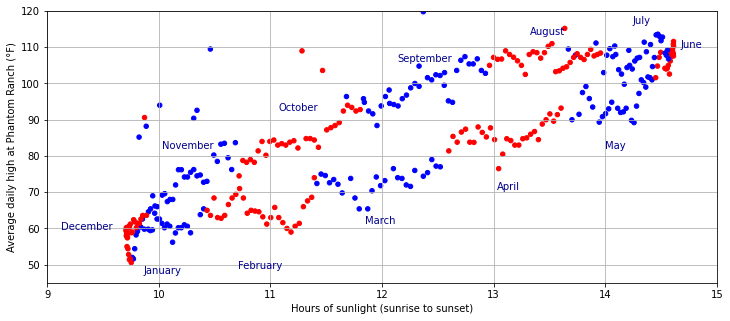

In [21]:
from calendar import month_name

j = w

scheme = {True: 'blue', False: 'red'}
color = (j['date'].dt.month % 2).replace(scheme)
ax = j.plot.scatter('hours_sunlight', 'F', color=color)
ax.grid()

#w.plot.scatter('hours_sunlight', 'F', marker='+', ax=ax)

for i, row in j.reset_index().iterrows():
    #print(row)
    month = row.date.month
    day = row.date.day
    x = row['hours_sunlight']
    y = row['F']
    if month > 6:
        yoff = 2.5
    else:
        yoff = -4.0
    if day % 10 == 0 and month not in (6, 12):
        if month % 2:
            color = 'blue'
        else:
            color = 'green'
        #ax.annotate(str(day), (x, y + yoff), ha='center')

ax.set_ylim(45, 120)
ax.set_xlim(9, 15)

months = j.groupby('month').mean().reset_index()
#print(months)
for i, row in months.iterrows():
    month = row['month']
    text = month_name[int(month)]
    x = row['hours_sunlight']
    y = row['F']
    if month == 6:
        x += 0.2
    elif month == 12:
        x -= 0.4
    elif month > 6:
        y += 6.5
    else:
        y -= 16.0
    ax.annotate(text, (x, y), ha='center', color='darkblue')
    
ax.set_xlabel('Hours of sunlight (sunrise to sunset)')
ax.set_ylabel('Average daily high at Phantom Ranch (°F)')